In [1]:
# Plots the VPRM outcome for different evi data sources and morris parameter pre analysis 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import Functions
from scipy import stats
import datetime
from os import listdir
from VPRM_offline.src.Offline_VPRM_for_Morris import flatten_list_2d
# from src.Offline_VPRM_for_Morris import flatten_list_2d


%run Functions.py

In [2]:
"""
Get the vprm data and plot them to compare to original 
"""

cwd = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/'
year = 2018
StationDataPath = cwd + 'data/HH_Data_small/'

path_vprm_output = cwd + 'VPRMoutput/'
path_sentinel = path_vprm_output + 'VPRM.SENTINEL2_500m_'+ str(year)+'.csv' 

df_sen = pd.read_csv(path_sentinel)

#get station names with year 
stations, snames = get_stations_year(year)
stations.set_index(stations['Station'], inplace=True)
# snames = ['SE-Nor']
print(snames)
length = len(snames)+1

['FI-Hyy' 'FI-Let' 'SE-Lnn' 'SE-Ros' 'SE-Svb' 'SE-Deg' 'SE-Htm' 'SE-Nor']


(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(1, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)
(24, 6)


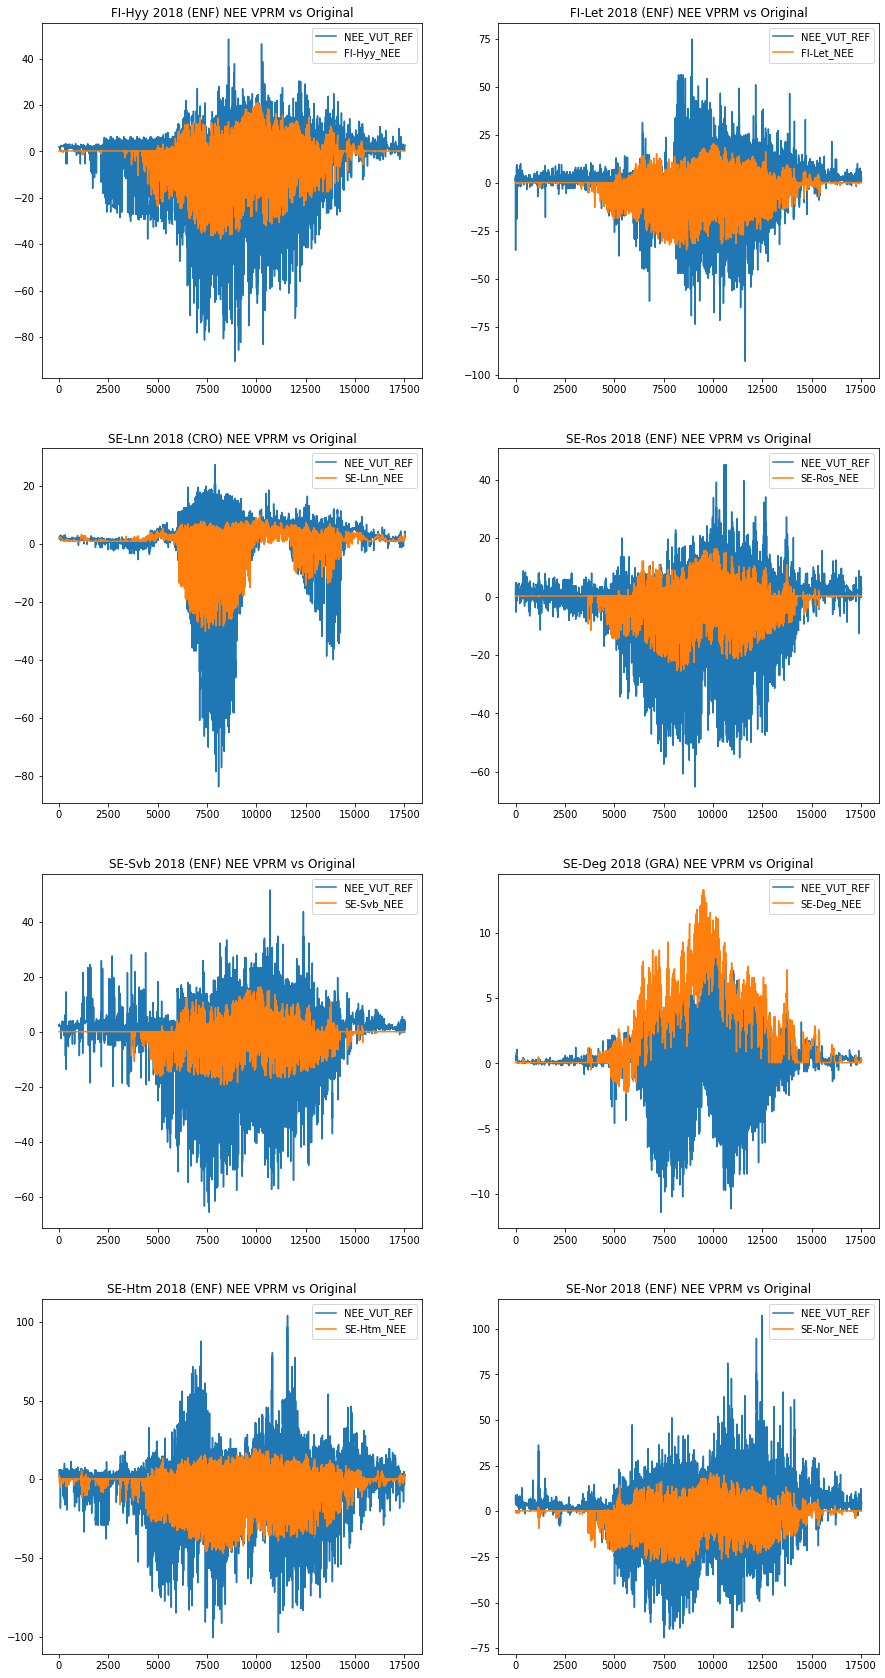

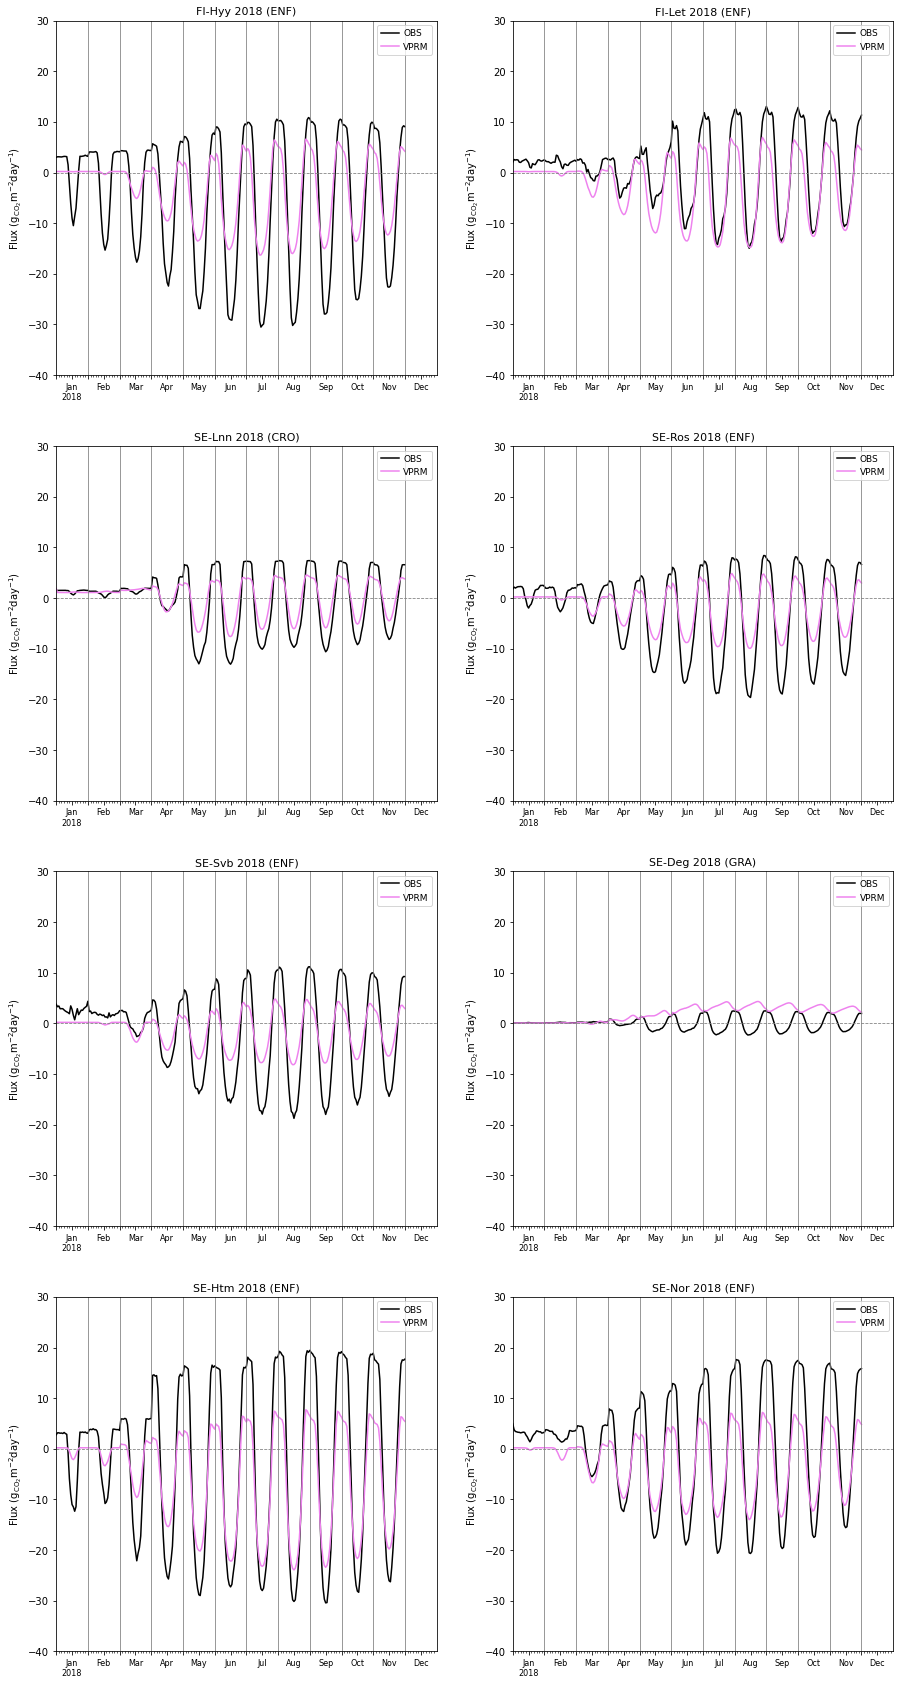

In [5]:
fig, axs = plt.subplots(int(length/2), 2, figsize = (15,30))
fig1, ax = plt.subplots(int(length/2), 2, figsize = (15,30))

begin = pd.date_range("2018-01-31", periods=12)
end = pd.date_range("2018-01-31", periods=12, freq="M")
label = 'Original' 
unit = '($\mathrm{g_{CO_2} m^{-2} day^{-1}}$)'

for i, sitename in enumerate(snames):
# for sitename in snames: 
    '''
    1. Get the station observation 
    '''
    fls = listdir(StationDataPath)

    fls = [x for x, y in zip(fls, [(sitename in file) for file in fls]) if y == True]
    # print(fls)
    df_obs = pd.read_table(StationDataPath+fls[0], sep=',')
    df_obs.date = pd.to_datetime(df_obs.date)
    df_obs['year'] = df_obs['date'].dt.year

    df_obs = df_obs[df_obs['year']==year]
    if 'NEE_VUT_REF' in df_obs.columns:
        label = 'NEE_VUT_REF'
    else:
        label = 'FC'
    
    if 'RECO_DT_VUT_REF' in df_obs.columns:
        label1 = 'RECO_DT_VUT_REF'
    else:
        label1 = 'RECO_NT_VUT_REF'
    
    if 'GPP_DT_VUT_REF' in df_obs.columns:
        label2 = 'GPP_DT_VUT_REF'
    else:
        label2 = 'GPP_NT_VUT_REF'
    

    df_obs.loc[df_obs[label] < -9990, label] = np.nan
    df_obs[label] = df_obs[label]*3600
    df_obs.loc[df_obs[label1] < -9990, label1] = np.nan
    df_obs[label1] = df_obs[label1]*3600
    df_obs.loc[df_obs[label2] < -9990, label2] = np.nan
    df_obs[label2] = df_obs[label2]*3600
    
    # df_obs.set_index('TIMESTAMP_START', inplace=True)
    df_obs = df_obs[['date',label, label1, label2]]
    # print(df_obs.shape)
    NEE_obs = df_obs[label].values

    '''
    2. Get the station vprm
    '''
    label = sitename + '_NEE'
    label1 = sitename + '_GEE'
    label2 = sitename + '_RSP' 
    df_vprm = df_sen[[label, label1, label2]]
    # print(df_vprm.shape)

    NEE_vprm = df_vprm[label].values
    # df = pd.concat([df_mod['Times'], df_morris, df_mod_ps, df_mod_s, df_sen_s], axis = 1).reset_index(drop=True)
    df_obs.reset_index(drop=True, inplace=True)
    df_vprm.reset_index(drop=True, inplace=True)
        
    df = pd.concat([df_obs, df_vprm], axis = 1)#.reset_index(drop=True)
    df.loc[:, df.columns != 'date'] =  df.loc[:, df.columns != 'date']/1000   
    # print(df.columns)
    df_NEE = df[['NEE_VUT_REF', sitename +'_NEE']]
    
    # print(stations.at[sitename, 'IGBP'])
    
    IGBP = stations.at[sitename, 'IGBP']

    
    '''
    3. Subplot HH
    '''
    # print(int(i/2), i%2)
    axs[int(i/2), i%2].plot(df_NEE, label = df_NEE.columns)
    axs[int(i/2), i%2].set_title(sitename +' '+ str(year) + ' ('+IGBP+') NEE VPRM vs Original')
    axs[int(i/2), i%2].legend(loc="upper right")
    # axs[int(i/2), i%2].legend(['NEE_VUT_REF', 'SE-Nor_NEE'],['Original NEE', 'VPRM NEE'])
    
    '''
    4. Subplot Journal 
    '''

    sen_nee = []
    obs_nee = []
    df.index = pd.to_datetime(df['date'])
    
    for month in range(len(begin)):

        df_opt_m = df[begin[month]:end[month]]
        df_opt_mean = df_opt_m.groupby([df_opt_m.index.hour]).mean()
        
        print(df_opt_mean.shape)
        obs_nee.append(df_opt_mean['NEE_VUT_REF'])

        sen_nee.append(df_opt_mean[sitename + '_NEE'])


    
    sen_nee = flatten_list_2d(sen_nee)
    obs_nee = flatten_list_2d(obs_nee)

    # print(len(obs_nee))

    time_day = np.arange(0,len(obs_nee))
    # fig,ax = plt.subplots(figsize=(15,5))
    # plt.subplots_adjust(left=0.13, right=0.81, top=0.9, bottom=0.12)
    colors = ['b','m','c']
    ax[int(i/2), i%2].plot(time_day, obs_nee, linewidth=1.5, color='k', label='OBS')
        # ax.plot(time_day, morris_nee, linewidth=1.5, color = 'orange', label='VPRM_morris')
        # ax.plot(time_day, mod_pp_nee, linewidth=1.5, color = 'g', label='VPRM_mod_pp')
        # ax.plot(time_day, mod_nee, linewidth=1.5, color = 'r', label='VPRM_mod')
    ax[int(i/2), i%2].plot(time_day, sen_nee, linewidth=1.5, color = 'violet', label='VPRM')


    legend=ax[int(i/2), i%2].legend(loc='upper right', shadow=False, fontsize=9, ncol=1, handletextpad=0.5)#, bbox_to_anchor=(1., 0.512))
    ax[int(i/2), i%2].set_xlim(0, 288)
    ax[int(i/2), i%2].set_ylim(-40, 30)
    for tt in range(24,288,24):
        ax[int(i/2), i%2].axvline(tt, color='grey', linewidth=0.8)
    ax[int(i/2), i%2].axhline(0, color='grey', linewidth=0.8, linestyle='--')
    # plt.ylabel('Flux '+unit, fontsize=10)
    ax[int(i/2), i%2].set_ylabel('Flux '+unit, fontsize=10)
    major_ticks = np.arange(0, 288, 12)
    minor_ticks = np.arange(0, 288, 2)
    ax[int(i/2), i%2].xaxis.set_ticks(major_ticks)
    #ax.set_xticklabels([0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12])
    ax[int(i/2), i%2].set_xticklabels(['','Jan\n'+str(year),'','Feb','','Mar','','Apr','','May','','Jun','','Jul','','Aug','','Sep','','Oct','','Nov','','Dec'])
    ax[int(i/2), i%2].xaxis.set_ticks(minor_ticks, minor = True)
    ax[int(i/2), i%2].xaxis.set_tick_params(which='major', labelsize=8)
    ax[int(i/2), i%2].set_title(sitename +' '+ str(year) + ' ('+IGBP+')', fontsize=11)
fig.savefig(cwd +'figures/'+ str(year)+'_stations_hh.png')   # save the figure to file
# plt.close(fig)
# plt.savefig('Oslo/Oslo_analysis/figures/')#+str(year)+'_stations_diurnal.png')
fig1.savefig(cwd +'figures/'+str(year)+'_stations_diurnal.png')   # save the figure to file
# plt.close(fig1)